## Assignment 2
    1. Name: Omkar Pawar
    2. Batch: R-9
    3. Roll No.: 43160

### Problem Statement : 
    Implementing Feedforward neural networks with Keras and TensorFlow

### A. Import necessary packages

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

#### b. Load the training and testing data (MNIST/CIFAR10)
    Grabbing the mnist dataset

In [2]:
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [3]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

### c. Define the network architecture using Keras    
Building the model

In [4]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [5]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 2ms/step - loss: 2.2938 - accuracy: 0.1319 - val_loss: 2.2590 - val_accuracy: 0.1971
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 2.2313 - accuracy: 0.3170 - val_loss: 2.1986 - val_accuracy: 0.4534
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 2.1637 - accuracy: 0.4839 - val_loss: 2.1189 - val_accuracy: 0.5968
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 2.0702 - accuracy: 0.5760 - val_loss: 2.0062 - val_accuracy: 0.5696
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 1.9393 - accuracy: 0.6105 - val_loss: 1.8514 - val_accuracy: 0.6355
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 1.7701 - accuracy: 0.6438 - val_loss: 1.6652 - val_accuracy: 0.6660
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 1.5793 - accuracy: 0.6735 - val_loss: 1.4700 - val_accuracy: 0.6980
Epoch 

### e. Evaluate the network    
Making the predictions

In [6]:
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       980
           1       0.77      0.99      0.86      1135
           2       0.80      0.72      0.76      1032
           3       0.70      0.84      0.77      1010
           4       0.68      0.77      0.73       982
           5       0.80      0.37      0.51       892
           6       0.83      0.91      0.87       958
           7       0.77      0.88      0.82      1028
           8       0.85      0.53      0.66       974
           9       0.69      0.58      0.63      1009

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.75     10000
weighted avg       0.77      0.76      0.75     10000



### f. Plot training loss and accuracy.

[]

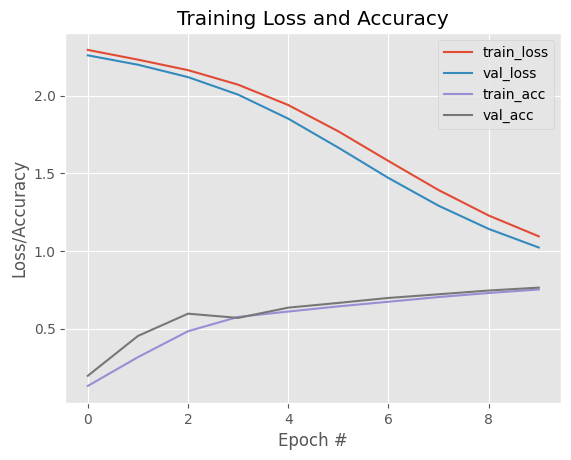

In [7]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.plot()